In [165]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [10]:
import os
import sys
project_dir = os.getcwd().split('notebooks')[0]
sys.path.append(project_dir)

In [11]:
from src.helper import *
from src.methods_py import *

### Framework:
- $A$ sparse matrix of size $m \times n$ with each row having at most $L$ nonzero entries
- We assume that the entries in A have been scaled to [-1,1]

In the reference paper, it is set $m = 10^{13}$. We wish to see in this case what the is the limit of the highest $n$ that we can use such that $A$ can still be stored. Then we'll compute $A^T A$ for different $n$ and analyse the corresponding calculation time.


In fact, we see that for $m=10^{13}$, we can't even stock the sparse matrix (even for small values of $n$):

In [128]:
# We get a memory error for m=10^13
A = sparse_generator(10**13, 1,L=1)

MemoryError: Unable to allocate 72.8 TiB for an array with shape (10000000000000, 1) and data type float64

Therefore we will do the tests with much smaller values of $m$. We'll define a function that computes the execution time for the matrix for each method:

- "analytic": Numpy's matrix multiplication ``A.T@A``
- "naive": Naive method of matrix multiplication
- "dimsum": Efficient method of matrix multiplication

In [137]:
def compute_time(A, method):
    """
    Function to compute time for each method of matrix multiplication
    input:
    A: sparse matrix
    method: can be "analytic", "naive" or "dimsum"
    output:
    execution time
    prod: matrix product
    """
    start = time.time()
    if method == "analytic":
        prod = A.T@A
    elif method == "naive":
        prod = NaiveProd(A)
    elif method == "dimsum":
        prod = DIMSUMProd(A, gamma = 0.5, nb_it = 1)
    
    end = time.time()
    return end-start, prod

In [163]:
#num = 10
#ms = np.linspace(10**2, 10**5, num)
ms = [10**2, 10**3, 10**4]
n = 10**2
L = 1
times_an = []
times_naiv = []
times_dim = []

error_naiv = []
error_dim = []
for ind,m in enumerate(ms):
    print(ind, m)
    m = int(m)
    A = sparse_generator(m, n,L)
    t_an, m_an = compute_time(A, "analytic")
    times_an.append(t_an)
    t_nai, m_nai = compute_time(A, "naive")
    times_naiv.append(t_nai)
    t_dim, m_dim = compute_time(A, "dimsum")
    times_dim.append(t_dim)
    error_naiv.append(np.linalg.norm(m_an - m_nai))
    error_dim.append(np.linalg.norm(m_an - m_dim))

0 100
1 1000
2 10000


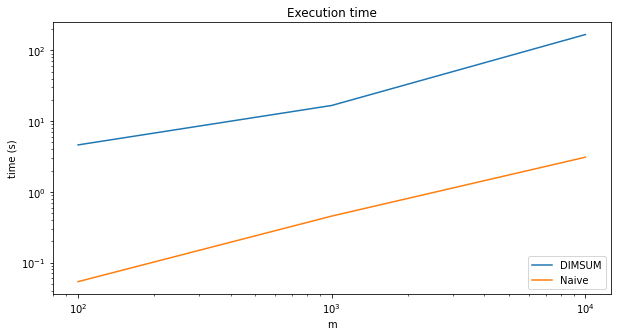

In [189]:
plt.figure(figsize=(10,5))
plt.loglog(ms, times_dim, label = 'DIMSUM')
plt.loglog(ms, times_naiv, label = 'Naive')
plt.legend(loc = 'lower right')
plt.xlabel('m')
plt.ylabel('time (s)')
plt.title('Execution time')
plt.show()

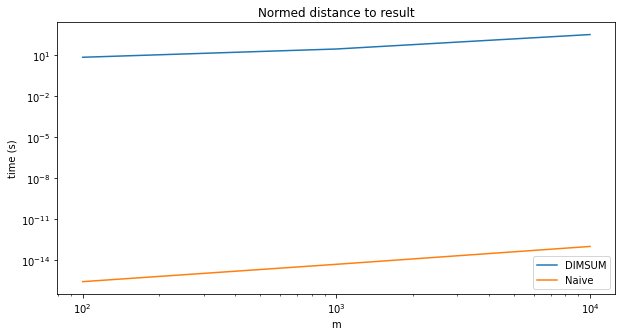

In [190]:
plt.figure(figsize=(10,5))
plt.loglog(ms, error_dim, label = 'DIMSUM')
plt.loglog(ms, error_naiv, label = 'Naive')
plt.legend(loc = 'lower right')
plt.xlabel('m')
plt.ylabel('time (s)')
plt.title('Normed distance to result')
plt.show()